In [1]:
from kafka import KafkaConsumer
import json
from multiprocessing import Process
import logging
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


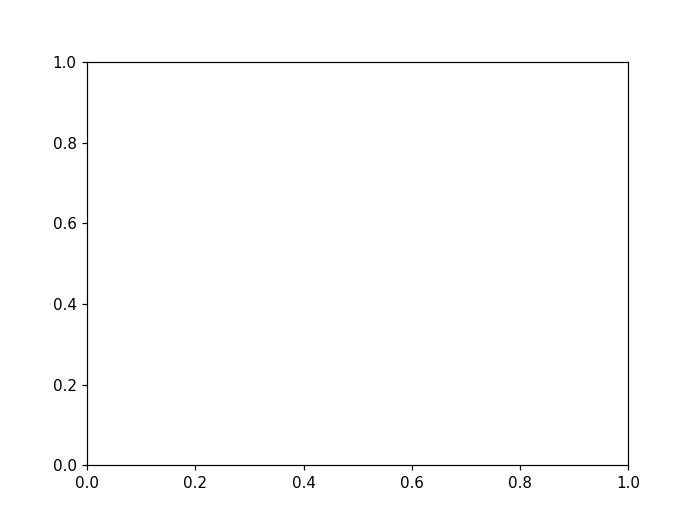

In [8]:


%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()


In [4]:
def get_current_offsets(consumer):
    current_offsets = {}

    # Obtém a lista de partições atribuídas ao consumidor
    partitions = consumer.assignment()

    for partition in partitions:
        # Obtém o offset atual para cada partição
        offset = consumer.position(partition)
        current_offsets[partition] = offset

    return current_offsets



class start_count_graph:
    
    def __init__(self):
        self.count = 0
        
    def count_add(self):
        self.count=self.count+1
        
    def count_zero(self):
        self.count=0
        
        
        
class df_handler:
    
    def __init__(self):
        self.df_message = None
        self.df_messages_store= None
        
        
    def create_df_from(self,message):
        self.df_message=pd.read_json(message)
    
    def concat_on_df(self,message):
        self.df_messages_store=pd.concat([self.df_message,pd.read_json(message)])

In [19]:
def consume_poll():
    try:
        while True:
            consumer = KafkaConsumer('sales-msg', bootstrap_servers=['localhost:19092','localhost:29092','localhost:39092'],
            api_version=(0,10,2),
            group_id='jupyter-consumers',
            enable_auto_commit=False)
            
            message = consumer.poll(max_records =1)
            print(message)
            for msg in message.values():
                print("Aqui")
                for k in msg:
                    #df_sales.concat_on_df(msg[0][6].decode('utf-8'))
                    #interrupter.count_add()
                    consumer.commit()
                    print("{}".format(get_current_offsets(consumer)))

    except:
        print("ERRO!")

In [102]:
def mltpcssng_consumer():
    logging.basicConfig(filename='consumer.log', level=logging.ERROR)
    
    n_consumer=3
    readden=[]
    
    for _ in range(n_consumer):
        p = Process(target=topic_consumer)
        p.daemon = True
        readden.append(p)
    
    for p in readden:
        p.start()
    
    for p in readden:
        p.join()

In [18]:
interrupter = start_count_graph()
df_sales = df_handler()

In [20]:
consume_poll()

{}
{}
ERRO!


In [44]:
consumer = KafkaConsumer('sales-msg', bootstrap_servers=['localhost:19092','localhost:29092','localhost:39092'],
api_version=(0,10,2),
group_id='jupyter-consumers',
enable_auto_commit=False)

message = consumer.poll(max_records =1)
print("{}".format(get_current_offsets(consumer)))

{TopicPartition(topic='sales-msg', partition=0): 4741, TopicPartition(topic='sales-msg', partition=1): 4732, TopicPartition(topic='sales-msg', partition=2): 4848}


In [8]:
consumer = KafkaConsumer('sales-msg', bootstrap_servers=['localhost:19092','localhost:29092','localhost:39092'],
api_version=(0,10,2),
group_id='jupyter-consumers',
enable_auto_commit=True)

In [12]:
for msg in consumer:  
    print(msg.value)

b'{"Invoice ID":{"154":"400-89-4171"},"Branch":{"154":"C"},"City":{"154":"Naypyitaw"},"Customer type":{"154":"Normal"},"Gender":{"154":"Female"},"Product line":{"154":"Sports and travel"},"Unit price":{"154":80.97},"Quantity":{"154":8},"Tax 5%":{"154":32.388},"Total":{"154":680.148},"Date":{"154":"1\\/28\\/2019"},"Time":{"154":"13:05"},"Payment":{"154":"Cash"},"cogs":{"154":647.76},"gross margin percentage":{"154":4.761904762},"gross income":{"154":32.388},"Rating":{"154":9.3}}'
b'{"Invoice ID":{"158":"743-04-1105"},"Branch":{"158":"B"},"City":{"158":"Mandalay"},"Customer type":{"158":"Member"},"Gender":{"158":"Male"},"Product line":{"158":"Health and beauty"},"Unit price":{"158":97.22},"Quantity":{"158":9},"Tax 5%":{"158":43.749},"Total":{"158":918.729},"Date":{"158":"3\\/30\\/2019"},"Time":{"158":"14:43"},"Payment":{"158":"Ewallet"},"cogs":{"158":874.98},"gross margin percentage":{"158":4.761904762},"gross income":{"158":43.749},"Rating":{"158":6.0}}'
b'{"Invoice ID":{"159":"423-57-2

b'{"Invoice ID":{"172":"733-33-4967"},"Branch":{"172":"C"},"City":{"172":"Naypyitaw"},"Customer type":{"172":"Normal"},"Gender":{"172":"Male"},"Product line":{"172":"Electronic accessories"},"Unit price":{"172":20.85},"Quantity":{"172":8},"Tax 5%":{"172":8.34},"Total":{"172":175.14},"Date":{"172":"3\\/3\\/2019"},"Time":{"172":"19:17"},"Payment":{"172":"Cash"},"cogs":{"172":166.8},"gross margin percentage":{"172":4.761904762},"gross income":{"172":8.34},"Rating":{"172":6.3}}'
b'{"Invoice ID":{"173":"608-27-6295"},"Branch":{"173":"B"},"City":{"173":"Mandalay"},"Customer type":{"173":"Member"},"Gender":{"173":"Male"},"Product line":{"173":"Electronic accessories"},"Unit price":{"173":52.89},"Quantity":{"173":6},"Tax 5%":{"173":15.867},"Total":{"173":333.207},"Date":{"173":"1\\/19\\/2019"},"Time":{"173":"17:34"},"Payment":{"173":"Credit card"},"cogs":{"173":317.34},"gross margin percentage":{"173":4.761904762},"gross income":{"173":15.867},"Rating":{"173":9.8}}'
b'{"Invoice ID":{"174":"414

b'{"Invoice ID":{"190":"284-34-9626"},"Branch":{"190":"B"},"City":{"190":"Mandalay"},"Customer type":{"190":"Normal"},"Gender":{"190":"Female"},"Product line":{"190":"Home and lifestyle"},"Unit price":{"190":77.04},"Quantity":{"190":3},"Tax 5%":{"190":11.556},"Total":{"190":242.676},"Date":{"190":"2\\/11\\/2019"},"Time":{"190":"10:39"},"Payment":{"190":"Credit card"},"cogs":{"190":231.12},"gross margin percentage":{"190":4.761904762},"gross income":{"190":11.556},"Rating":{"190":7.2}}'
b'{"Invoice ID":{"191":"437-58-8131"},"Branch":{"191":"B"},"City":{"191":"Mandalay"},"Customer type":{"191":"Normal"},"Gender":{"191":"Female"},"Product line":{"191":"Fashion accessories"},"Unit price":{"191":73.52},"Quantity":{"191":2},"Tax 5%":{"191":7.352},"Total":{"191":154.392},"Date":{"191":"1\\/15\\/2019"},"Time":{"191":"13:41"},"Payment":{"191":"Ewallet"},"cogs":{"191":147.04},"gross margin percentage":{"191":4.761904762},"gross income":{"191":7.352},"Rating":{"191":4.6}}'


KeyboardInterrupt: 

In [32]:
message = consumer.poll(max_records =1)
for msg in message.values():
    for k in msg:
        #df_sales.concat_on_df(msg[0][6].decode('utf-8'))
        #interrupter.count_add()
        consumer.commit()
        print("{}".format(get_current_offsets(consumer)))


{TopicPartition(topic='sales-msg', partition=0): 11538, TopicPartition(topic='sales-msg', partition=1): 11465, TopicPartition(topic='sales-msg', partition=2): 11588}


In [28]:
print("{}".format(get_current_offsets(consumer)))

{TopicPartition(topic='sales-msg', partition=0): 11538, TopicPartition(topic='sales-msg', partition=1): 11461, TopicPartition(topic='sales-msg', partition=2): 11588}
